In [1]:
import geodatasets
import geopandas
import sys 

# Add the hamilton module to your path - optinal
# project_dir = "### ADD PATH HERE ###"
# sys.path.append(project_dir)

from hamilton import base, driver
#from hamilton.io.materialization import to
from hamilton.function_modifiers import extract_columns
from hamilton.plugins import h_geopandas

In [18]:
#load in the example dataset 
#chicago = geopandas.read_file(geodatasets.get_path("geoda.chicago_commpop"))
#groceries = geopandas.read_file(geodatasets.get_path("geoda.groceries")).to_crs(chicago.crs)

In [2]:
# We use the autoreload extension that comes with ipython to automatically reload modules when
# the code in them changes.

# import the jupyter extension
%load_ext autoreload
# set it to only reload the modules imported
%autoreload 1

In [15]:
%%writefile geometric_calculations.py
# Define your new Hamilton functions.
# The %%writefile magic command creates a new Python module with the functions below.
# We will import this later and pass it into our Driver.

import geopandas
import geodatasets
from hamilton.function_modifiers import extract_columns

@extract_columns("community", "POP2010", "geometry")
def base_df(base_df_location: str) -> geopandas.GeoDataFrame:
    """Loads base dataframe of data.

    :param base_df_location: just showing that we could load this from a file...
    :return:
    """
    chicago = geopandas.read_file(geodatasets.get_path("geoda.chicago_commpop"))
    return chicago
 
# Look at `my_functions` to see how these functions connect.
def chicago_area(geometry: geopandas.GeoSeries) -> geopandas.GeoSeries:
    """Get the area of the row using the geometry column"""
    return 10000 * geometry.area 

def chicago_population(POP2010: geopandas.GeoSeries) -> geopandas.GeoSeries:
    """ Get the population of the area of interest"""
    return POP2010

def chicago_population_density(chicago_area: geopandas.GeoSeries, chicago_population: geopandas.GeoSeries) -> geopandas.GeoSeries:
    """ Calculate the population density"""
    return chicago_population/chicago_area

Overwriting geometric_calculations.py


In [12]:
%aimport geometric_calculations
#from hamilton import base 

config = {
    "base_df_location": "dummy_value",
}
adapter = base.SimplePythonGraphAdapter(result_builder=h_geopandas.GeoPandasDataFrameResult())
dr = driver.Driver(config, geometric_calculations, adapter=adapter) 

In [19]:
gdf_builder = base.PandasDataFrameResult()
dr = driver.Driver({}, geometric_calculations)  # can pass in multiple modules

In [13]:
# we need to specify what we want in the final dataframe. These can be string names, or function references.
output_columns = [
    "community",
    "chicago_population",
    "chicago_area",
    "chicago_population_density",
    "geometry",
]

          community  chicago_population  chicago_area  \
0           DOUGLAS               18238      4.632396   
1           OAKLAND                5918      1.702833   
2       FULLER PARK                2876      2.004699   
3   GRAND BOULEVARD               21929      4.881245   
4           KENWOOD               17841      2.926158   
..              ...                 ...           ...   
72  MOUNT GREENWOOD               19093      7.594687   
73      MORGAN PARK               22544      9.230990   
74            OHARE               12756     37.524990   
75        EDGEWATER               56521      4.890111   
76      EDISON PARK               11187      3.194218   

    chicago_population_density  \
0                  3937.055140   
1                  3475.385799   
2                  1434.629223   
3                  4492.501531   
4                  6097.073294   
..                         ...   
72                 2513.994352   
73                 2442.208199   
74       

/home/jordan/Desktop/OpenSource/hamilton-js/examples/geopandas/materialization/geometric_calculations.py:22: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return 10000 * geometry.area


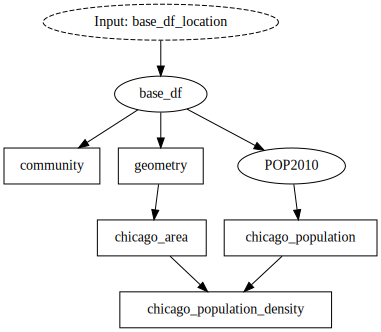

In [14]:
# Execute the driver.

df = dr.execute(output_columns)
print(df)

# To visualize do `pip install "sf-hamilton[visualization]"` if you want these to work
dr.visualize_execution(output_columns)

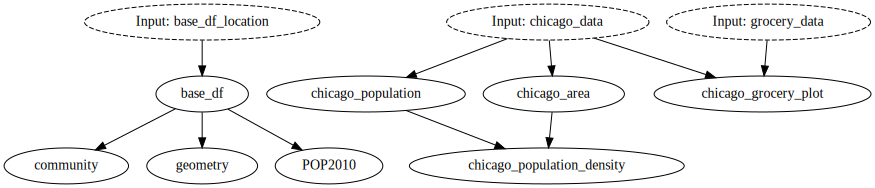

In [10]:
dr.display_all_functions()